In [1]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('titanic.csv')

In [11]:
df

,survived,pclass,name,sex,age,fare,sibsp,parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0
...,...,...,...,...,...,...,...,...
709,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,29.1250,0,5
710,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,0,0
711,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,0,0
712,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,0,0


In [12]:
df.head(10)

,survived,pclass,name,sex,age,fare,sibsp,parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0
5,0,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,0,0
6,0,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,3,1
7,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,0,2
8,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,1,0
9,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,1,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   name      714 non-null    object 
 3   sex       714 non-null    object 
 4   age       714 non-null    float64
 5   fare      714 non-null    float64
 6   sibsp     714 non-null    int64  
 7   parch     714 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 44.8+ KB


In [14]:
df.isnull()

,survived,pclass,name,sex,age,fare,sibsp,parch
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
709,False,False,False,False,False,False,False,False
710,False,False,False,False,False,False,False,False
711,False,False,False,False,False,False,False,False
712,False,False,False,False,False,False,False,False


#missing value

In [15]:
df.isnull().sum()

survived    0
pclass      0
name        0
sex         0
age         0
fare        0
sibsp       0
parch       0
dtype: int64

#Exploratory Data Analsis

In [17]:
df['survived'].value_counts()

survived
0    424
1    290
Name: count, dtype: int64

In [18]:
df['survived'].value_counts(normalize=True)

survived
0    0.593838
1    0.406162
Name: proportion, dtype: float64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns 

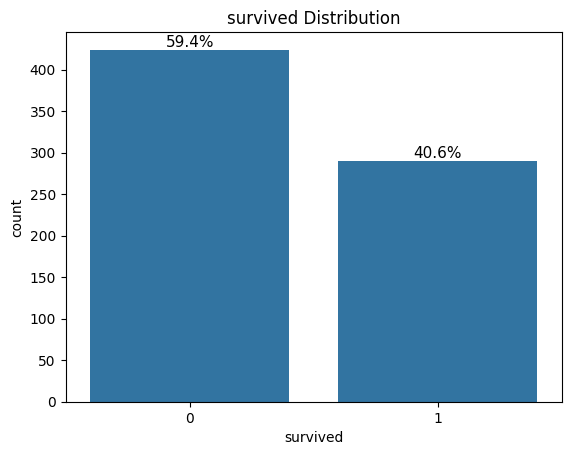

In [30]:
ax = sns.countplot(x='survived' , data=df)
plt.title("survived Distribution")
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100* count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage , (x , y) , ha = 'center' , va = 'bottom' , fontsize = 11)

plt.show()


In [31]:
df.groupby('sex')['survived'].mean()

sex
female    0.754789
male      0.205298
Name: survived, dtype: float64

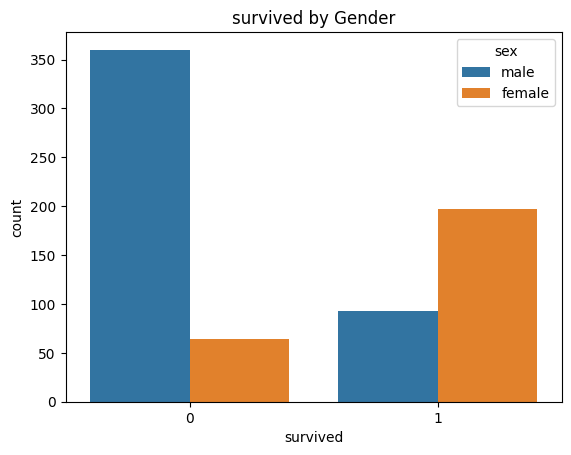

In [34]:
sns.countplot(x='survived' , hue ='sex' , data=df)
plt.title('survived by Gender')
plt.show()

In [35]:
df.groupby('pclass')['survived'].mean()

pclass
1    0.655914
2    0.479769
3    0.239437
Name: survived, dtype: float64

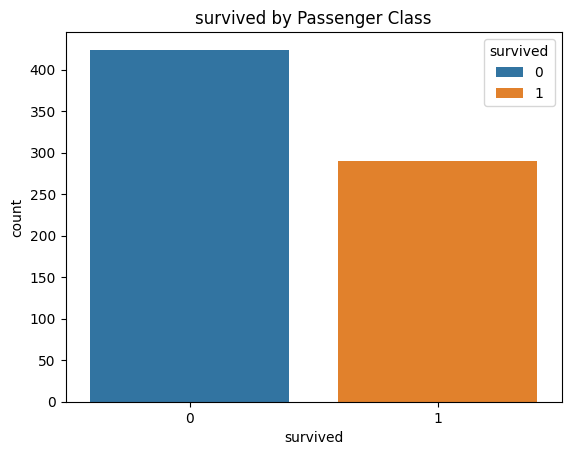

In [37]:
sns.countplot(x='survived' , hue = 'survived' , data=df)
plt.title('survived by Passenger Class')
plt.show()

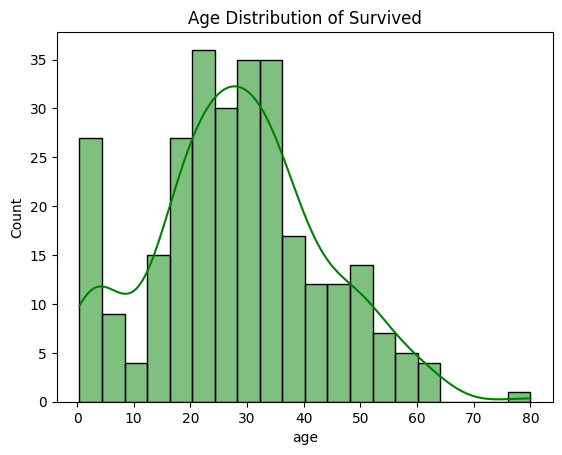

In [38]:
sns.histplot(data = df[df['survived']==1] , x = 'age' , bins=20 , kde=True , color = 'green')
plt.title('Age Distribution of Survived')
plt.show()

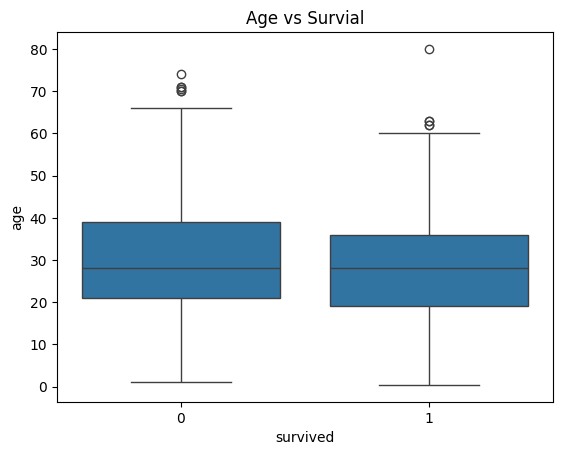

In [39]:
sns.boxplot(x='survived' , y = 'age' , data=df)
plt.title('Age vs Survial')
plt.show()

In [40]:
pd.crosstab(df['sex'] , df['pclass'] , margins=True)

pclass,1,2,3,All
sex,,,,
female,85,74,102,261
male,101,99,253,453
All,186,173,355,714


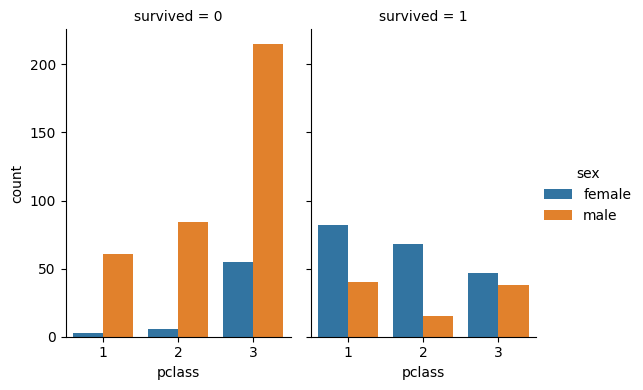

In [41]:
sns.catplot(x = 'pclass', hue='sex' , col= 'survived' , 
            data=df , kind='count' , height=4 , aspect=0.7)